# TP2 Analitica predictiva - ITBA - Agustin Alfie



### LIBRERIAS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os as os
import scipy.stats as stats
import sweetviz as sv
import catboost as cb
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.layers import Dropout
import math
from statistics import mode
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### Importacion datos

In [2]:
entreno = pd.read_csv(r'C:\Users\agustin\Desktop\ITBA\ANALITICA PREDICTIVA\origen.csv', delimiter=',', engine= 'python')

In [3]:
import random
random.seed(7)

### Automatizacion de EDA

In [ ]:
reporte = sv.analyze(entreno)
reporte.show_html('reporte.html')

#insertar un par de fotos del reporte y despues algunos graficos mas

#### Decisiones a partir del priemer reporte


A la hora de modelar se van a tomar distintas instancias. La primea instancia del modelo va a ser con las variables que no tengan (o menos del 10%) de datos vacios.

En una segunda instancia cuando se quiera mejorar el modelo se van a agregar varibles con hasta el 60% de valores nulos, pero con decisiones de como tratar a estos mismos

En la ultima implementacion, si no se llega a un r2 bueno se va a buscar implementar varables con hasta 90% de valores nulos



### Primera limpieza: Seleccion variables y limpieza

In [124]:
def guardar_id(df):
    id = df['Id']
    return id

In [125]:
def seleccion_M2(df):
    
    df.drop(['attributes'], axis=1, inplace=True)
    #df.drop(['seasonNumber'], axis=1, inplace=True)
    #df.drop(['episodeNumber'], axis=1, inplace=True)
    #df.drop(['ordering'], axis=1, inplace=True)
    #df.drop(['numVotes'], axis=1, inplace=True) 
    #df.drop(['language'], axis=1, inplace=True) 
    #df.drop(['isOriginalTitle'], axis=1, inplace=True)
    return df

In [126]:
def seleccion_M3(df):
    df.drop(['adult'], axis=1, inplace=True)
    df.drop(['budget'], axis=1, inplace=True)
    df.drop(['original_language'], axis=1, inplace=True)
    df.drop(['genres_y'], axis=1, inplace=True)
    df.drop(['overview'], axis=1, inplace=True)
    df.drop(['production_companies'], axis=1, inplace=True)
    df.drop(['tagline'], axis=1, inplace=True)
    df.drop(['video'], axis=1, inplace=True)
    df.drop(['endYear'], axis=1, inplace=True)
    df.drop(['Id'], axis=1, inplace=True)

    #df.drop(['popularity'], axis=1, inplace=True)
    #df.drop(['production_countries'], axis=1, inplace=True)
    #df.drop(['release_date'], axis=1, inplace=True)
    #df.drop(['revenue'], axis=1, inplace=True)
    #df.drop(['runtime'], axis=1, inplace=True)
    #df.drop(['status'], axis=1, inplace=True)
    return df

In [127]:
def generos(df):
    df[['genero1','genero2_']] = df.genres_x.apply(lambda x: pd.Series(str(x).split(",", 1))) 
    df[['genero2','genero3']] = df.genero2_.apply(lambda x: pd.Series(str(x).split(",", 1)))





    df['documentary'] = np.where((df['genero1'] == 'Documentary') | (df['genero2'] == 'Documentary') , 1, 0)
    df['short'] = np.where((df['genero1'] == 'Short') | (df['genero2'] == 'Short') , 1, 0)
    df['music'] = np.where((df['genero1'] == 'Music') | (df['genero2'] == 'Music') , 1, 0)
    df['crime'] = np.where((df['genero1'] == 'Crime') | (df['genero2'] == 'Crime') , 1, 0)
    df['adventure'] = np.where((df['genero1'] == 'Adventure') | (df['genero2'] == 'Adventure') , 1, 0)
    df['family'] = np.where((df['genero1'] == 'Family') | (df['genero2'] == 'Family') , 1, 0)
    df['animation'] = np.where((df['genero1'] == 'Animation') | (df['genero2'] == 'Animation') , 1, 0)
    df['comedy'] = np.where((df['genero1'] == 'Comedy') | (df['genero2'] == 'Comedy') , 1, 0)
    df['romance'] = np.where((df['genero1'] == 'Romance') | (df['genero2'] == 'Romance') , 1, 0)
    df['drama'] = np.where((df['genero1'] == 'Drama') | (df['genero2'] == 'Drama') , 1, 0)
    df['action'] = np.where((df['genero1'] == 'Action') | (df['genero2'] == 'Action') , 1, 0)






    #df['adult'] = np.where((df['genero1'] == 'Adult') | (df['genero2'] == 'Adult') , 1, 0)
    #df['film noir'] = np.where((df['genero1'] == 'Film-Noir') | (df['genero2'] == 'Film-Noir') , 1, 0)
    #df['biography'] = np.where((df['genero1'] == 'Biography') | (df['genero2'] == 'Biography') , 1, 0)
    #df['history'] = np.where((df['genero1'] == 'History') | (df['genero2'] == 'History') , 1, 0)
    #df['sport'] = np.where((df['genero1'] == 'Sport') | (df['genero2'] == 'Sport') , 1, 0)
    #df['musical'] = np.where((df['genero1'] == 'Musical') | (df['genero2'] == 'Musical') , 1, 0)
    #df['western'] = np.where((df['genero1'] == 'Western') | (df['genero2'] == 'Western') , 1, 0)
    #df['war'] = np.where((df['genero1'] == 'War') | (df['genero2'] == 'War') , 1, 0)
    #df['mystery'] = np.where((df['genero1'] == 'Mystery') | (df['genero2'] == 'Mystery') , 1, 0)
    #df['thriller'] = np.where((df['genero1'] == 'Thriller') | (df['genero2'] == 'Thriller') , 1, 0)
    #df['horror'] = np.where((df['genero1'] == 'Horror') | (df['genero2'] == 'Horror') , 1, 0)
    #df['sci fi'] = np.where((df['genero1'] == 'Sci-Fi') | (df['genero2'] == 'Sci-Fi') , 1, 0)
    #df['fantasy'] = np.where((df['genero1'] == 'Fantasy') | (df['genero2'] == 'Fantasy') , 1, 0)
    #df['news'] = np.where((df['genero1'] == 'News') | (df['genero2'] == 'News') , 1, 0)
    #df['talk show'] = np.where((df['genero1'] == 'Talk-Show') | (df['genero2'] == 'Talk-Show') , 1, 0)
    #df['game show'] = np.where((df['genero1'] == 'Game-Show') | (df['genero2'] == 'Game-Show') , 1, 0)
    #df['reality tv'] = np.where((df['genero1'] == 'Reality-TV') | (df['genero2'] == 'Reality-TV') , 1, 0)


    df.drop(['genres_x'], axis=1, inplace=True)
    df.drop(['genero1'], axis=1, inplace=True)
    df.drop(['genero2'], axis=1, inplace=True)
    df.drop(['genero2_'], axis=1, inplace=True)
    df.drop(['genero3'], axis=1, inplace=True)
    return df

In [128]:
def directores(df):
    df[['director_principal','restodirectores']] = df.directors.apply(lambda x: pd.Series(str(x).split(",", 1))) 


    top_direc = df.director_principal.value_counts().sort_values(ascending=False).head(100) #top 20 directores
    top_direc = top_direc.iloc[1:]
    df = df.assign(top_direc = 0)
    df.loc[df['director_principal'].isin(top_direc.index), 'top_direc'] = 1
    



    df = df.drop(columns = ['director_principal'])
    df = df.drop(columns = ['restodirectores'])
    df = df.drop(columns = ['directors'])

    
    return df

In [129]:
def escritores(df):
    df[['escritor_principal','restoescritores']] = df.writers.apply(lambda x: pd.Series(str(x).split(",", 1))) 
    top_escrit = df.escritor_principal.value_counts().sort_values(ascending=False).head(100) 
    top_escrit = top_escrit.iloc[1:]
    df = df.assign(top_escrit = 0)
    df.loc[df['escritor_principal'].isin(top_escrit.index), 'top_escrit'] = 1



    df = df.drop(columns = ['escritor_principal'])
    df = df.drop(columns = ['restoescritores'])
    df = df.drop(columns = ['writers'])

    return df

In [130]:
def titleType(df):

    
    df['movie'] = np.where((df['titleType'] == 'movie'), 1, 0)
    df['short'] = np.where((df['titleType'] == 'short'), 1, 0)
    df['tvSeries'] = np.where((df['titleType'] == 'tvSeries'), 1, 0)
    df['tvEpisode'] = np.where((df['titleType'] == 'tvEpisode'), 1, 0)
    df['video'] = np.where((df['titleType'] == 'video'), 1, 0)
    df['tvMovie'] = np.where((df['titleType'] == 'tvMovie'), 1, 0)

    df = df.drop(columns = ['titleType'])
    return df

In [131]:
def esSerie(df):
    df['esSerie'] = np.where((df['seasonNumber'] > 0), 1, 0)
    df = df.drop(columns = ['seasonNumber'])
    return df

In [132]:
def idioma(df):  # ingles vs resto

    
    df['English'] = np.where((df['language'] == 'en') |(df['language'].isnull()==True) , 1, 0) #los null son la moda
    #df['Spanish'] = np.where((df['language'] == 'es'), 1, 0)
    #df['French'] = np.where((df['language'] == 'fr'), 1, 0)
    #df['yi'] = np.where((df['language'] == 'yi'), 1, 0)
    #df['haw'] = np.where((df['language'] == 'haw'), 1, 0)
    df = df.drop(columns = ['language'])
   
    return df

In [133]:
def status(df):
    df['released'] = np.where((df['status'] == 'Released') | (df['status'].isnull() == True) , 1, 0)  # se asume que si esta en null ya se estreno, sino no tendria sentido que hayan tantas sin estrenar
    # df['Production'] = np.where((df['status'] == 'Post Production') | (df['status'] == 'In Production'), 1, 0)
    df = df.drop(columns = ['status'])
    return df

In [134]:
def pais_origen(df):
    us = []
    uk=[]

    for i in range(len(df)):
        j = df.production_countries[i]

        if type(j)==str:
            if j.find("US") >0:
                us.append(1)
            else:
                us.append(0)
        else:
            us.append(0)

        if type(j)==str:
            if j.find("GB") >0:
                uk.append(1)
            else:
                uk.append(0)      
        else:
            uk.append(0)


    df['us'] = us
    df['uk'] = uk
    df = df.drop(columns = ['production_countries'])
    
    return df

In [135]:
def ordering(df): 
    j= mode(entreno['ordering'])
    df['ordering_'] = np.where((df['ordering'].isnull() == True) , j, 0) 
    df = df.drop(['ordering'], axis=1)
    return df

In [136]:
def runtime(df):
    from numpy import median
    df['runtimeMinutes'] = np.where((df['runtimeMinutes']<=0) , np.mean(df['runtimeMinutes']), df['runtimeMinutes'])

    return df


In [137]:
def startyear(df):

    #separar la fecha solo en aniols y asi va a agrupar mejor
    df[['anio','resto']] = df.release_date.apply(lambda x: pd.Series(str(x).split("-", 1)))
    df [['anio']]= df[['anio']].astype(float)
    
    
    df = df.drop(columns = ['resto'])
    df = df.drop(['release_date'], axis=1)
    return df

In [138]:
def titulo_orignial(df):

    df['isOriginalTitle'] = np.where((df['isOriginalTitle'].isnull() == True), 1, df['isOriginalTitle'])


    return df

In [139]:
def varias(df):
    df['revenue'] = np.where((df['revenue'] <= 0) | (df['revenue'].isna() == True), np.mean(df['revenue']), df['revenue'])

    df['runtime'] = np.where(df['runtime'] <= 0 , np.mean(df['runtime']), df['runtime'])



    df['runtimeMinutes'] = np.where(df['runtimeMinutes'] <= 0 , np.mean(df['runtimeMinutes']), df['runtimeMinutes'])

    df['startYear'] = np.where(df['startYear'] <= 0 , np.mean(df['startYear']), df['startYear'])

    df['isAdult'] = np.where((df['isAdult']==0) & (df['isAdult'] != 1), 0, df['isAdult']) 

    


    return df

In [140]:
def seleccion_sin_na(df):
    df = df.drop(columns = ['revenue'])
    df = df.drop(columns = ['runtime'])
    df = df.drop(columns = ['anio'])
    df = df.drop(columns = ['runtimeMinutes'])
    df = df.drop(columns = ['popularity'])
    df = df.drop(columns= ['episodeNumber'])
    return df

In [141]:
def modelo(df):
    df = seleccion_M2(df)
    df = seleccion_M3(df)
    df = generos(df)
    df = directores(df)
    df = escritores(df)
    df = titleType(df)
    df = esSerie(df)
    df = idioma(df)
    df = pais_origen(df)
    df = status(df)
    df = ordering(df)
    df = startyear(df)
    df = runtime(df)
    df = titulo_orignial(df)
    df = varias(df)
    return df


In [142]:
id_entreno1 = guardar_id(entreno)

In [143]:
entreno = modelo(entreno)

In [144]:
entreno_nas = seleccion_sin_na(entreno)

### Nuevo reporte

In [ ]:
reporte1 = sv.analyze(entreno)
reporte1.show_html('reporte1.html')

#### Decisiones a partir del segundo reporte

Se van a agrupar variables binarias de genero asi podemos lograr tener mas informacion real, habian muchas columnas con muy pocos datos de positivos


El r2 en un xgboost con grid search es de 029 en twest aproximadamente
el r2 en un catboost sin grid search es 31

Se espera que con estos cambiso en la base el modelo mejore


### Train - Test split

In [145]:
from sklearn.model_selection import train_test_split

# para boosting

def train_test(df):
    X = df.drop(columns = ['averageRating'])
    y = df['averageRating']
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print(x_train.shape), print(y_train.shape)
    print(x_test.shape), print(y_test.shape)
    return x_train, x_test, y_train, y_test


In [146]:
x_train, x_test, y_train, y_test = train_test(entreno)

x_train1, x_test1, y_train1, y_test1 = train_test(entreno_nas)

(782032, 34)
(782032,)
(195509, 34)
(195509,)
(782032, 28)
(782032,)
(195509, 28)
(195509,)


### Regresion lineal

In [118]:
lr = LinearRegression()
lr.fit(x_train1, y_train1)

LinearRegression()

In [119]:
lr_pred = lr.predict(x_test1)
rmse = np.sqrt(mean_squared_error(y_test1,lr_pred))
rmse

r2 = r2_score(y_test1,lr_pred)
print("The rmse is:", rmse)
print("The r2 is:", r2)

The rmse is: 1.2777288519435979
The r2 is: 0.177059784898275


### Random forest



In [120]:
random = RandomForestRegressor(max_depth=10, n_estimators=300, max_features=1)
random.fit(x_train1, y_train1)
print("RandomForestRegressor")
print("Accuracy:",random.score(x_train1, y_train1))
print("Accuracy test:",random.score(x_test1, y_test1))

RandomForestRegressor
Accuracy: 0.18101460861956487
Accuracy test: 0.1815952350797999


In [148]:
regr3 = RandomForestRegressor(max_depth=11,random_state=42)
fregr3 = regr3.fit(x_train1,y_train1)
predrff = fregr3.predict(x_test1)
r2_train_rf = fregr3.score(x_train1, y_train1)
r2_test_rf = fregr3.score(x_test1, y_test1)
rmse_rr1 = np.sqrt(mean_squared_error(y_test1,predrff))
print("Random Forest")
print("r2_train: ", r2_train_rf)
print("r2_test: ", r2_test_rf)
print('rmse test:', rmse_rr1)

Random Forest
r2_train:  0.3026542137568121
r2_test:  0.29836511466820004
rmse test: 1.179804764529581


#### Grid search random forest

In [123]:
param_rf = {

    'bootstrap': [True],

    'max_depth': [11, 15, 20],

    'max_features': [2, 3],

    'min_samples_leaf': [3, 4, 5], 

    'min_samples_split': [8, 10, 12], 
    
    'n_estimators': [300, 500, 1000]

}

In [124]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


rf = RandomForestRegressor()
grid_search = RandomizedSearchCV(estimator = rf, param_distributions=  param_rf, cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(x_train1, y_train1)

C = grid_search.best_estimator_
best_grid = grid_search.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [125]:
pred = grid_search.predict(x_test1)
r2_train2 = grid_search.score(x_train1, y_train1)
r2_test_rf = r2_score(y_test1,pred)
rmse_rr = np.sqrt(mean_squared_error(y_test1,pred))
print("Random Forest")
print("r2_train: ", r2_train2)
print("r2_test: ", r2_test_rf)

Random Forest
r2_train:  0.32700517175042343
r2_test:  0.3130790387666843


### catboost


In [126]:
cat = CatBoostRegressor(eval_metric="RMSE",
                        learning_rate=0.9,
                        iterations=500,
                        bagging_temperature=0.2,
                   )
cat.fit(x_train,y_train)

c:\Users\agustin\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 1.2601237	total: 177ms	remaining: 1m 28s
1:	learn: 1.2378204	total: 202ms	remaining: 50.2s
2:	learn: 1.2311892	total: 225ms	remaining: 37.3s
3:	learn: 1.2241826	total: 247ms	remaining: 30.7s
4:	learn: 1.2172541	total: 271ms	remaining: 26.8s
5:	learn: 1.2138593	total: 292ms	remaining: 24s
6:	learn: 1.2103975	total: 314ms	remaining: 22.1s
7:	learn: 1.2083926	total: 333ms	remaining: 20.5s
8:	learn: 1.2060739	total: 353ms	remaining: 19.2s
9:	learn: 1.2040781	total: 372ms	remaining: 18.2s
10:	learn: 1.2021726	total: 392ms	remaining: 17.4s
11:	learn: 1.2011451	total: 411ms	remaining: 16.7s
12:	learn: 1.1999892	total: 430ms	remaining: 16.1s
13:	learn: 1.1982683	total: 450ms	remaining: 15.6s
14:	learn: 1.1969875	total: 469ms	remaining: 15.2s
15:	learn: 1.1954680	total: 489ms	remaining: 14.8s
16:	learn: 1.1935285	total: 510ms	remaining: 14.5s
17:	learn: 1.1921870	total: 531ms	remaining: 14.2s
18:	learn: 1.1910578	total: 552ms	remaining: 14s
19:	learn: 1.1903158	total: 585ms	remaining:

In [130]:
pred_cat = cat.predict(x_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred_cat)))
r2 = r2_score(y_test, pred_cat)


c:\Users\agustin\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0.34802643790253684

In [168]:
r2_train= cat.score(x_train,y_train)
r2_test= cat.score(x_test,y_test)
print("r2_train: ", r2_train)
print("r2_test: ", r2_test)
print('rnse is:', rmse)

c:\Users\agustin\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


r2_train:  0.3666847647362621
r2_test:  0.34802643790253684
rnse is: 1.1372856288264088


#### Grid search catboost

In [25]:
parameters = {'depth'         : [4,5,6,7,8,9, 10],
                 'learning_rate' : [0.1,0.02,0.9,0.08],
                  'iterations'    : [300, 500, 1000, 800],
                  'l2_leaf_reg': [0.2, 0.5, 1, 3]
                 }

In [46]:

cbr = CatBoostRegressor()
Grid_CBR = RandomizedSearchCV(cbr, param_distributions = parameters, cv = 3, n_jobs=-1)
Grid_CBR.fit(x_train, y_train)

c:\Users\agustin\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 1.2366151	total: 205ms	remaining: 1m 42s
1:	learn: 1.2149878	total: 261ms	remaining: 1m 4s
2:	learn: 1.2089351	total: 313ms	remaining: 51.9s
3:	learn: 1.1979586	total: 365ms	remaining: 45.3s
4:	learn: 1.1910560	total: 414ms	remaining: 41s
5:	learn: 1.1874951	total: 465ms	remaining: 38.2s
6:	learn: 1.1846005	total: 513ms	remaining: 36.1s
7:	learn: 1.1824506	total: 560ms	remaining: 34.4s
8:	learn: 1.1791867	total: 608ms	remaining: 33.2s
9:	learn: 1.1739255	total: 659ms	remaining: 32.3s
10:	learn: 1.1726437	total: 710ms	remaining: 31.6s
11:	learn: 1.1699330	total: 760ms	remaining: 30.9s
12:	learn: 1.1677783	total: 812ms	remaining: 30.4s
13:	learn: 1.1666307	total: 860ms	remaining: 29.9s
14:	learn: 1.1653503	total: 911ms	remaining: 29.4s
15:	learn: 1.1641158	total: 963ms	remaining: 29.1s
16:	learn: 1.1623535	total: 1.01s	remaining: 28.8s
17:	learn: 1.1602919	total: 1.06s	remaining: 28.4s
18:	learn: 1.1581083	total: 1.11s	remaining: 28.1s
19:	learn: 1.1564901	total: 1.16s	remainin

RandomizedSearchCV(cv=3,
                   estimator=<catboost.core.CatBoostRegressor object at 0x00000167CD29F820>,
                   n_jobs=-1,
                   param_distributions={'depth': [4, 5, 6, 7, 8, 9, 10],
                                        'iterations': [300, 500, 1000, 800],
                                        'l2_leaf_reg': [0.2, 0.5, 1, 3],
                                        'learning_rate': [0.1, 0.02, 0.9,
                                                          0.08]})

In [47]:
pred_cat = Grid_CBR.predict(x_test)
rmse_cat = (np.sqrt(mean_squared_error(y_test, pred_cat)))
r2_cat = r2_score(y_test, pred_cat)
print("“Testing performance”")
print('‘RMSE: {:.2f}'.format(rmse_cat))
print('‘R2: {:.2f}'.format(r2_cat))

“Testing performance”
‘RMSE: 1.12
‘R2: 0.37


### Xgboost

In [50]:
x_train['anio'] = x_train['anio'].astype(float)
x_test['anio'] = x_test['anio'].astype(float)

In [51]:

xgbr = xgb.XGBRegressor(verbosity=0, max_depth=10,learning_rate=0.1, n_estimators=350, random_state=42)
regr = xgbr.fit(x_train,y_train)
pred_xg = xgbr.predict(x_test)
r2_train= regr.score(x_train,y_train)
r2_test= r2_score(y_test,pred_xg)
print("r2_train: ", r2_train)
print("r2_test: ", r2_test)

r2_train:  0.4312353506114074
r2_test:  0.38144230873135754


In [53]:
r2_test= r2_score(y_test,pred_xg)
rmse_xg1= np.sqrt(mean_squared_error(y_test,pred_xg))
print("r2_train: ", r2_train)
print("r2_test: ", r2_test)
print(rmse_xg1)

r2_train:  0.4312353506114074
r2_test:  0.38144230873135754
1.107757411443074


#### Grid search Xgboost

In [139]:
params ={
    "leraning_rate"    : [0.3,0.5,0.7, 0.9, 0.01, 0.05] ,
    "max_depth"        : [9,11,13],
    "min_child_weight" : [3, 5,7, 9, 12],
    "gamma"            : [0.1, 0.3, 0.4],
    "colsample_bytree" : [0.7, 0.9],
    'n_estimators'     : [100, 300], 
    'reg_alpha'        : [0.1, 0.5, 1],
    'random_state'     : [0, 42]
}

In [140]:
xg = xgb.XGBRegressor()
random_search= RandomizedSearchCV(xg, param_distributions = params, cv = 3 ,n_jobs = -1, verbose = 0) 
random_search.fit(x_train,y_train)


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None,
                                          reg_alpha=None, reg_lambda=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.9],
                                        'gamma': [0.1, 0.3, 0.4],
                                        'leraning_rate': [0.3, 0.5, 0.7, 0.9,
                                                          0.01, 0.05],
                                        'max_depth': [9, 11, 13],
                                        'min_child_weight': [3, 5, 7, 9, 12],
                                        'n_estimators': [100, 300],
                                        'random_state': [0, 42],
                                        'reg_alpha': [0.1, 0.5, 1]})

In [141]:

r2_train= random_search.score(x_train,y_train)
pred_xg = random_search.predict(x_test)
r2_test_xg = r2_score(y_test,pred_xg)
rmse_xg =(np.sqrt(mean_squared_error(y_test, pred_xg)))



In [142]:
print("rmse test: ", rmse_xg)
print("r2_train: ", r2_train) #47
print("r2_test: ", r2_test_xg) # 38

rmse test:  1.102842413653545
r2_train:  0.466896730502932
r2_test:  0.3869190766878783


In [167]:
random_search.best_params_

{'reg_alpha': 1,
 'random_state': 0,
 'n_estimators': 100,
 'min_child_weight': 9,
 'max_depth': 13,
 'leraning_rate': 0.5,
 'gamma': 0.4,
 'colsample_bytree': 0.7}

### KNN

In [148]:
rmse_val = [] #to store rmse values for different k


opc = [30, 60, 100, 1500, 300, 500]
mejorrmse = 2
mejorr2 = 0
mejork = 0

for K in opc:
    
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train1, y_train1)  #fit the model
    predknn=model.predict(x_test1) #make prediction on test set
    error = sqrt(mean_squared_error(y_test1,predknn)) #calculate rmse
    r2knn = r2_score(y_test1,predknn)
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error, 'and r2 is:', r2knn)
    if error < mejorrmse and r2knn > mejorr2:
        mejorrmse = error
        mejorr2 = r2knn
        mejor_k = K

RMSE value for k=  30 is: 1.247896201641555 and r2 is: 0.215039490763546
RMSE value for k=  60 is: 1.2625935978123306 and r2 is: 0.19644048433331585
RMSE value for k=  100 is: 1.2762938535095945 and r2 is: 0.17890721095021445
RMSE value for k=  1500 is: 1.353522247612774 and r2 is: 0.07653236368402871
RMSE value for k=  300 is: 1.3101088607592295 and r2 is: 0.1348216354113715
RMSE value for k=  500 is: 1.3256128724581928 and r2 is: 0.11422318607271609


<AxesSubplot: >

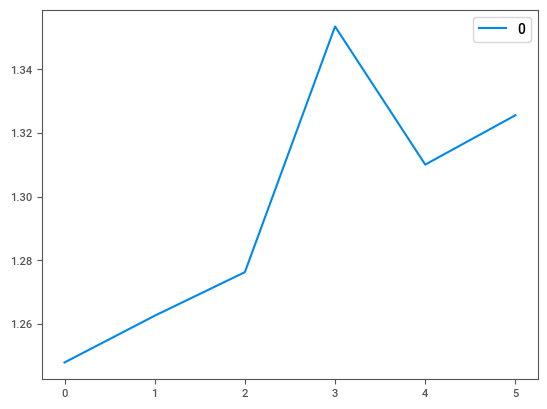

In [149]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

### Comparacion de modelos


In [150]:
print('En el modelo de regresion lineal el mejor r2 es:', r2, ' y el rmse es: ', rmse)
print('En el modelo catboost con el ajuste de hiperparametros se obtiene un r2 de:', r2_cat, ' y un rmse de:', rmse_cat)
print('En el modelo xgboost con ajusto dfe hiperparametros se obtiene un r2 de:', r2_test_xg, ' y un rmse de:', rmse_xg)
print('En el modelo de random forest con ajuste de hiparparametros se obtiene un r2 de:', r2_test_rf, ' y un rmse de:', rmse_rr)
print("En el modelo knn con ajuste de hiperparametro se obtiene un r2 de:", mejorr2, "y un rmse de:", mejorrmse)

En el modelo de regresion lineal el mejor r2 es: 0.34802643790253684  y el rmse es:  1.1372856288264088
En el modelo catboost con el ajuste de hiperparametros se obtiene un r2 de: 0.28433544529293064  y un rmse de: 1.191541883567549
En el modelo xgboost con ajusto dfe hiperparametros se obtiene un r2 de: 0.3869190766878783  y un rmse de: 1.102842413653545
En el modelo de random forest con ajuste de hiparparametros se obtiene un r2 de: 0.3130790387666843  y un rmse de: 1.167368427229628
En el modelo knn con ajuste de hiperparametro se obtiene un r2 de: 0.215039490763546 y un rmse de: 1.247896201641555


### testeo y descarga base

In [ ]:
testeo = pd.read_csv(r'C:\Users\agustin\Desktop\ITBA\ANALITICA PREDICTIVA\testear.csv', delimiter=',', engine= 'python')
id_testeo1 = guardar_id(testeo)
testeo = modelo(testeo)

In [ ]:
prediccion = random_search.predict(testeo)
d = {'averageRating': prediccion}
df_entrega = pd.DataFrame(data=d)
#df_entrega.to_csv('prediccion.csv', sep=',', index = True, index_label = 'Id')

In [ ]:
df_entrega